## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  84.900841   370.601626  0.614149   9.370060  1.256127
1  30.135557  1243.713763  0.394921   9.579310  1.565254
2  11.671848  1507.783343  0.304989   6.565484  1.578336
3  88.991386   885.132461  0.188948  10.376014  1.117642
4  61.163890  1418.765752  0.118601   7.978392  1.159235


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0338361	total: 62.2ms	remaining: 1m 2s
1:	learn: 1.0223448	total: 63.2ms	remaining: 31.5s
2:	learn: 1.0106625	total: 63.9ms	remaining: 21.2s
3:	learn: 0.9993044	total: 64.6ms	remaining: 16.1s
4:	learn: 0.9872872	total: 65.2ms	remaining: 13s
5:	learn: 0.9757181	total: 65.9ms	remaining: 10.9s
6:	learn: 0.9619932	total: 66.4ms	remaining: 9.42s
7:	learn: 0.9498715	total: 67ms	remaining: 8.31s
8:	learn: 0.9392893	total: 68.2ms	remaining: 7.5s
9:	learn: 0.9260472	total: 69ms	remaining: 6.83s
10:	learn: 0.9133052	total: 69.5ms	remaining: 6.25s
11:	learn: 0.9023016	total: 70.1ms	remaining: 5.77s


12:	learn: 0.8924691	total: 71.6ms	remaining: 5.44s
13:	learn: 0.8815466	total: 72.7ms	remaining: 5.12s
14:	learn: 0.8686974	total: 73.4ms	remaining: 4.82s
15:	learn: 0.8598757	total: 74ms	remaining: 4.55s
16:	learn: 0.8482333	total: 74.7ms	remaining: 4.32s
17:	learn: 0.8381819	total: 75.3ms	remaining: 4.11s
18:	learn: 0.8295906	total: 75.9ms	remaining: 3.92s
19:	learn: 0.8179899	total: 76.5ms	remaining: 3.75s
20:	learn: 0.8085223	total: 77ms	remaining: 3.59s
21:	learn: 0.8003528	total: 77.6ms	remaining: 3.45s
22:	learn: 0.7904309	total: 77.9ms	remaining: 3.31s
23:	learn: 0.7804903	total: 78.5ms	remaining: 3.19s
24:	learn: 0.7709034	total: 79ms	remaining: 3.08s
25:	learn: 0.7625681	total: 79.6ms	remaining: 2.98s
26:	learn: 0.7535732	total: 80.1ms	remaining: 2.89s
27:	learn: 0.7446575	total: 80.6ms	remaining: 2.8s
28:	learn: 0.7363378	total: 81.1ms	remaining: 2.71s
29:	learn: 0.7270964	total: 81.8ms	remaining: 2.65s
30:	learn: 0.7190841	total: 82.3ms	remaining: 2.57s
31:	learn: 0.710574

200:	learn: 0.2079516	total: 159ms	remaining: 633ms
201:	learn: 0.2068950	total: 160ms	remaining: 631ms
202:	learn: 0.2055560	total: 160ms	remaining: 629ms
203:	learn: 0.2044642	total: 161ms	remaining: 627ms
204:	learn: 0.2036649	total: 161ms	remaining: 625ms
205:	learn: 0.2027233	total: 161ms	remaining: 622ms
206:	learn: 0.2014745	total: 162ms	remaining: 620ms
207:	learn: 0.2003573	total: 162ms	remaining: 618ms
208:	learn: 0.1996292	total: 163ms	remaining: 616ms
209:	learn: 0.1987149	total: 163ms	remaining: 614ms
210:	learn: 0.1978732	total: 163ms	remaining: 611ms
211:	learn: 0.1969349	total: 164ms	remaining: 609ms
212:	learn: 0.1958580	total: 164ms	remaining: 607ms
213:	learn: 0.1949915	total: 165ms	remaining: 605ms
214:	learn: 0.1940334	total: 165ms	remaining: 603ms
215:	learn: 0.1929389	total: 166ms	remaining: 601ms
216:	learn: 0.1919395	total: 166ms	remaining: 599ms
217:	learn: 0.1910824	total: 166ms	remaining: 597ms
218:	learn: 0.1903871	total: 167ms	remaining: 595ms
219:	learn: 

348:	learn: 0.1222074	total: 221ms	remaining: 412ms
349:	learn: 0.1220017	total: 222ms	remaining: 412ms
350:	learn: 0.1216967	total: 222ms	remaining: 410ms
351:	learn: 0.1213574	total: 223ms	remaining: 410ms
352:	learn: 0.1208809	total: 223ms	remaining: 409ms
353:	learn: 0.1203236	total: 223ms	remaining: 407ms
354:	learn: 0.1200322	total: 224ms	remaining: 406ms
355:	learn: 0.1197689	total: 224ms	remaining: 405ms
356:	learn: 0.1192849	total: 224ms	remaining: 404ms
357:	learn: 0.1187439	total: 225ms	remaining: 403ms
358:	learn: 0.1181426	total: 225ms	remaining: 402ms
359:	learn: 0.1178318	total: 226ms	remaining: 401ms
360:	learn: 0.1174262	total: 226ms	remaining: 400ms
361:	learn: 0.1169841	total: 226ms	remaining: 399ms
362:	learn: 0.1165273	total: 227ms	remaining: 398ms
363:	learn: 0.1160823	total: 227ms	remaining: 397ms
364:	learn: 0.1153791	total: 227ms	remaining: 396ms
365:	learn: 0.1148108	total: 228ms	remaining: 395ms
366:	learn: 0.1142516	total: 228ms	remaining: 394ms
367:	learn: 

565:	learn: 0.0571864	total: 312ms	remaining: 239ms
566:	learn: 0.0569957	total: 313ms	remaining: 239ms
567:	learn: 0.0568093	total: 313ms	remaining: 238ms
568:	learn: 0.0564862	total: 314ms	remaining: 238ms
569:	learn: 0.0563043	total: 314ms	remaining: 237ms
570:	learn: 0.0561264	total: 315ms	remaining: 236ms
571:	learn: 0.0559390	total: 315ms	remaining: 236ms
572:	learn: 0.0556351	total: 316ms	remaining: 235ms
573:	learn: 0.0554618	total: 316ms	remaining: 235ms
574:	learn: 0.0551616	total: 316ms	remaining: 234ms
575:	learn: 0.0549385	total: 317ms	remaining: 233ms
576:	learn: 0.0547131	total: 317ms	remaining: 233ms
577:	learn: 0.0544957	total: 318ms	remaining: 232ms
578:	learn: 0.0543296	total: 318ms	remaining: 231ms
579:	learn: 0.0540448	total: 319ms	remaining: 231ms
580:	learn: 0.0538248	total: 319ms	remaining: 230ms
581:	learn: 0.0536088	total: 319ms	remaining: 229ms
582:	learn: 0.0534016	total: 320ms	remaining: 229ms
583:	learn: 0.0532435	total: 320ms	remaining: 228ms
584:	learn: 

736:	learn: 0.0317521	total: 383ms	remaining: 137ms
737:	learn: 0.0316950	total: 384ms	remaining: 136ms
738:	learn: 0.0315679	total: 384ms	remaining: 136ms
739:	learn: 0.0314178	total: 385ms	remaining: 135ms
740:	learn: 0.0313623	total: 385ms	remaining: 135ms
741:	learn: 0.0312442	total: 386ms	remaining: 134ms
742:	learn: 0.0311170	total: 386ms	remaining: 134ms
743:	learn: 0.0310473	total: 387ms	remaining: 133ms
744:	learn: 0.0309320	total: 387ms	remaining: 133ms
745:	learn: 0.0308032	total: 388ms	remaining: 132ms
746:	learn: 0.0307001	total: 388ms	remaining: 131ms
747:	learn: 0.0305815	total: 388ms	remaining: 131ms
748:	learn: 0.0304943	total: 389ms	remaining: 130ms
749:	learn: 0.0304273	total: 389ms	remaining: 130ms
750:	learn: 0.0303471	total: 390ms	remaining: 129ms
751:	learn: 0.0302330	total: 392ms	remaining: 129ms
752:	learn: 0.0301344	total: 393ms	remaining: 129ms
753:	learn: 0.0300225	total: 393ms	remaining: 128ms
754:	learn: 0.0299376	total: 394ms	remaining: 128ms
755:	learn: 

939:	learn: 0.0195552	total: 474ms	remaining: 30.2ms
940:	learn: 0.0194992	total: 474ms	remaining: 29.7ms
941:	learn: 0.0194709	total: 475ms	remaining: 29.2ms
942:	learn: 0.0194158	total: 475ms	remaining: 28.7ms
943:	learn: 0.0193878	total: 476ms	remaining: 28.2ms
944:	learn: 0.0193073	total: 476ms	remaining: 27.7ms
945:	learn: 0.0192284	total: 477ms	remaining: 27.2ms
946:	learn: 0.0191801	total: 477ms	remaining: 26.7ms
947:	learn: 0.0191529	total: 478ms	remaining: 26.2ms
948:	learn: 0.0191141	total: 478ms	remaining: 25.7ms
949:	learn: 0.0190583	total: 478ms	remaining: 25.2ms
950:	learn: 0.0190057	total: 479ms	remaining: 24.7ms
951:	learn: 0.0189522	total: 479ms	remaining: 24.2ms
952:	learn: 0.0188785	total: 479ms	remaining: 23.6ms
953:	learn: 0.0188056	total: 480ms	remaining: 23.1ms
954:	learn: 0.0187165	total: 480ms	remaining: 22.6ms
955:	learn: 0.0186295	total: 481ms	remaining: 22.1ms
956:	learn: 0.0185581	total: 481ms	remaining: 21.6ms
957:	learn: 0.0184867	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.22814163356428213


ABC Pre-generator MAE 0.5935640716560662


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

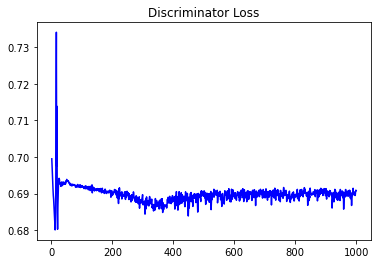

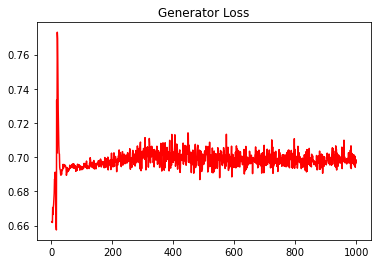

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3603512226752937


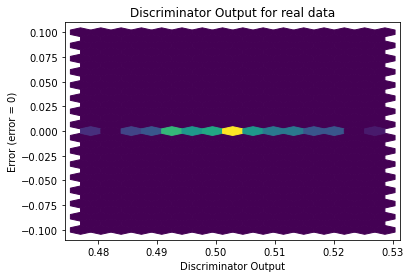

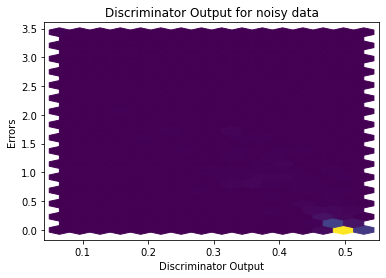

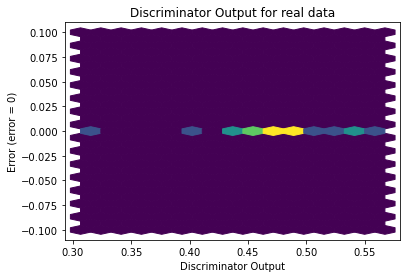

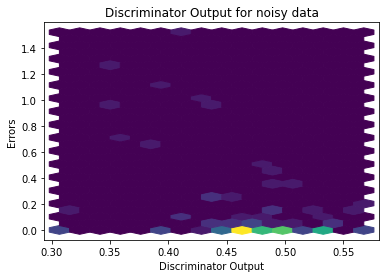

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

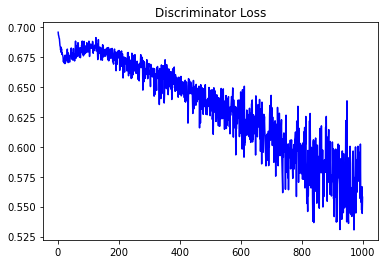

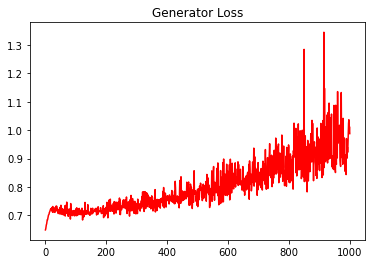

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.458443030808121


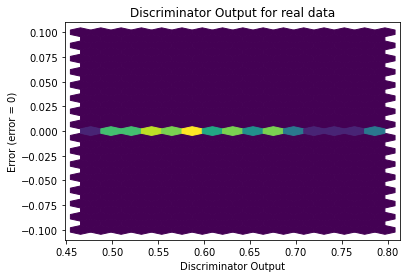

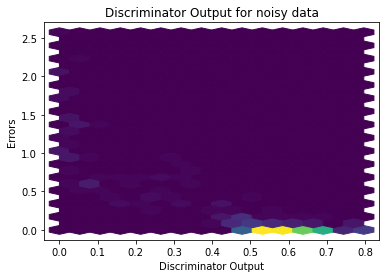

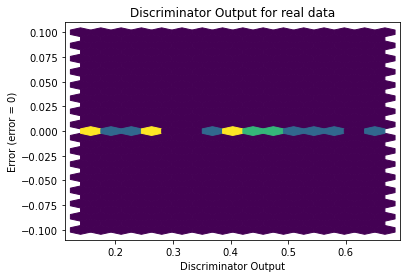

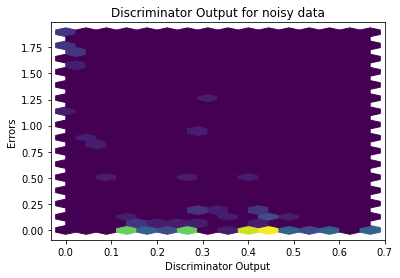

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


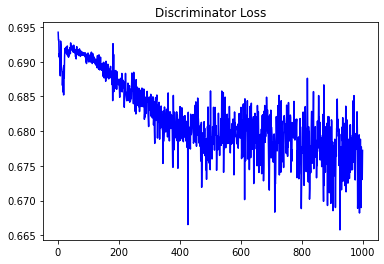

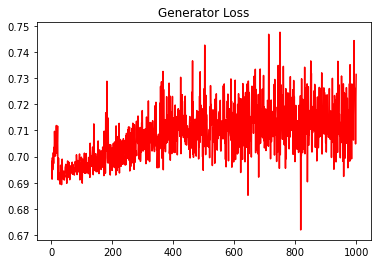

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.35108643636107445


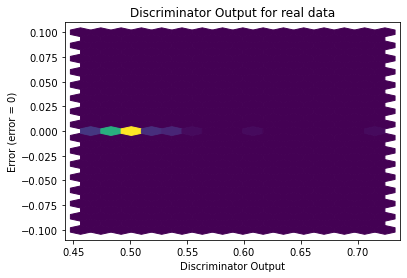

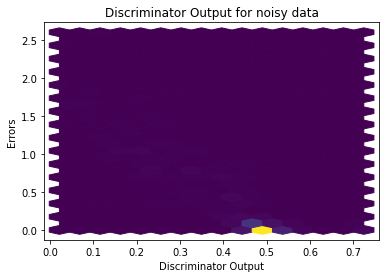

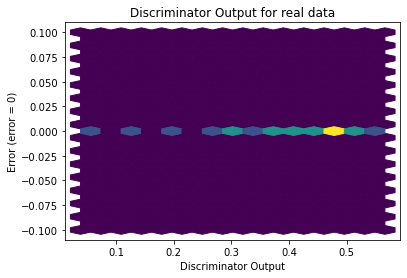

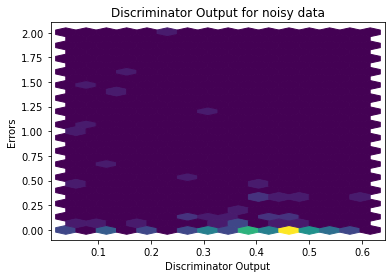

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


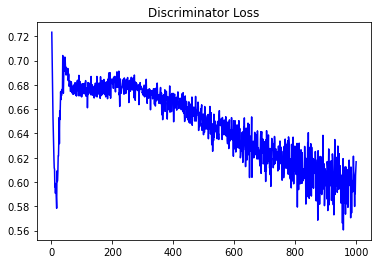

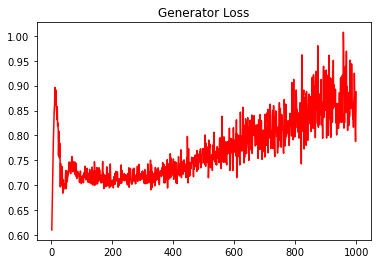

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3867479351758666


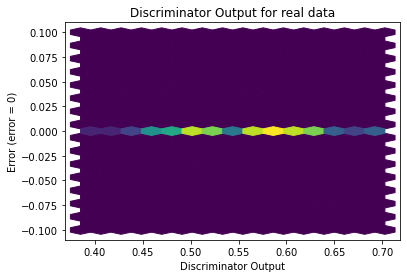

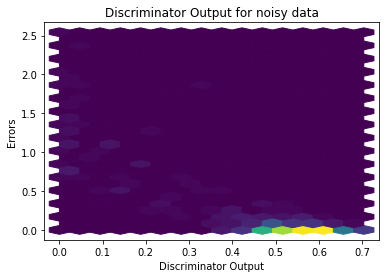

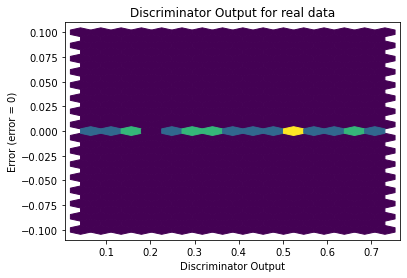

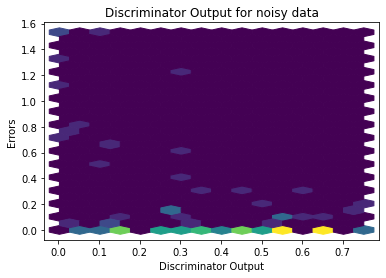

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1807]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9478]], requires_grad=True)
